In [1]:
import numpy as np
import matplotlib.pyplot as plt
from loadMnist import loadMnist
from kNN import kNN 
from tqdm import tqdm

In [2]:
# Load training and test data
trainingImages, trainingLabels = loadMnist('training')
testImages, testLabels = loadMnist('testing')

print(np.unique(trainingLabels))

[0 1 2 3 4 5 6 7 8 9]


In [3]:
trainingImages.shape

(60000, 784)

In [4]:
# Keep a subset of the training (60,000 images) and test (10,000) data
trainingImages = trainingImages[:2000,:]
trainingLabels = trainingLabels[:2000]

# Test for only a subset of the dataset (e.g., 20 images) to keep the running time relatively low
testImages = testImages[:1000,:]
testLabels = testLabels[:1000]

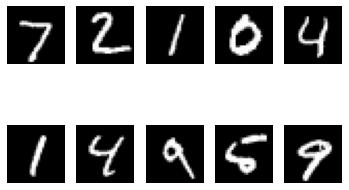

In [5]:
# Show the first ten digits
fig = plt.figure('First 10 Digits') 
for i in range(10):
    a = fig.add_subplot(2,5,i+1) 
    plt.imshow(testImages[i,:].reshape(28,28), cmap=plt.cm.gray)
    plt.axis('off')

plt.show()

In [6]:
# Run kNN algorithm
# k = 2
def predict_values(k):
    predictedDigits = np.zeros(testImages.shape[0])

    for i in range(testImages.shape[0]):
#         print("Current Test Instance: " + str(i+1))
        predictedDigits[i] = kNN(k, trainingImages, trainingLabels, testImages[i,:])

    # Calculate accuracy
    correct = 0

    for i in range(testImages.shape[0]):
        if predictedDigits[i] == testLabels[i]:
            correct += 1

    accuracy = correct/float(testImages.shape[0])
#     print("Accuracy: " + str(accuracy))
    return accuracy

100%|██████████| 11/11 [01:19<00:00,  7.22s/it]


Text(0.5, 0, 'K')

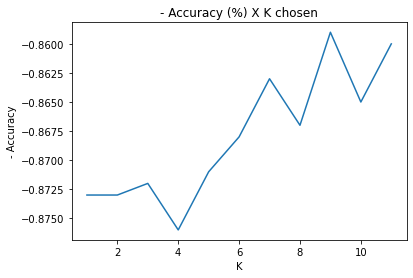

In [7]:
accuracy_list = []
for k in tqdm(range(1,12)):
    accuracy_list.append(-predict_values(k))
    
plt.plot(range(1,12),accuracy_list)
plt.title('- Accuracy (%) X K chosen')
plt.ylabel('- Accuracy')
plt.xlabel('K')